# Depression Model

This notebook is made to create Depression Classification Model.

## Import All Dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import os

## Download Depression Dataset

Download Depression dataset from our github.

The dataset contains 39775 datas of answer from depression's questions.

In [2]:
!wget https://raw.githubusercontent.com/C22-PS315/mental-health-fitness/main/ml/Data%20Preparation/Depression.csv

--2022-06-10 14:01:28--  https://raw.githubusercontent.com/C22-PS315/mental-health-fitness/main/ml/Data%20Preparation/Depression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1467191 (1.4M) [text/plain]
Saving to: ‘Depression.csv’

Depression.csv      100%[===================>]   1.40M  --.-KB/s    in 0.008s  

2022-06-10 14:01:28 (168 MB/s) - ‘Depression.csv’ saved [1467191/1467191]



In [3]:
dep = pd.read_csv('Depression.csv')
dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Scale_Dep
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,Parah
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,Parah
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,Sangat Parah
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,Sedang
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,Sangat Parah


In [4]:
dep.shape

(39775, 15)

## Convert Categorical Data to Numerical

Most machine learning and deep learning models require all input and output variables to be numeric. Therefore, we need to encode the categorical data into numerical form.

One Hot Encoding can turns categorical data into a binary vector representation. This is a type of encoding that creates a new binary variable for each possible category.  For each unique variable in the categorical data, a new binary column is created. The value in the column is represented as 1 if the value matches the column header, otherwise the value is 0.

Use `pd.get_dummies(data, column=[], prefix='')` to convert the categorical variables in to encoded columns in the same DataFrame.

`pd.get_dummies()` = Convert categorical variable into dummy/indicator variables.

`column` = Column names in the DataFrame to be encoded.

`prefix` = String to append DataFrame column names. Default `original column name`.

`prefix_sep` = Separator/delimiter used when appending prefix. Default `_`.

In [5]:
dep = pd.get_dummies(dep, columns=['Scale_Dep'], prefix='', prefix_sep='')
dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Normal,Parah,Ringan,Sangat Parah,Sedang
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,0,1,0,0,0
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,0,1,0,0,0
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,0,0,0,1,0
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,0,0,0,0,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,0,0,0,1,0


## Split Data

### Split Data for Training and Testing

Split the dataset into 80% for Training and 20% for Testing.

`frac` = Fraction of axis items to return. Percent of the sample.

`random_state` = Seed for random number generator.

`DataFrame.drop(data.index)` = Remove rows by specifying the index.

In [6]:
train_data = dep.sample(frac=0.8, random_state=0)
test_data = dep.drop(train_data.index)

In [7]:
print(len(train_data), 'Data for training')
print(len(test_data), 'Data for testing')

31820 Data for training
7955 Data for testing


In [8]:
train_data.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Normal,Parah,Ringan,Sangat Parah,Sedang
33099,1,1,0,1,0,1,0,0,1,1,1,0,1,3,0,0,1,0,0
30943,0,1,1,0,2,0,0,2,1,3,0,0,0,3,0,0,1,0,0
22923,1,1,1,1,1,2,2,1,1,1,2,2,2,1,0,0,0,0,1
3607,1,3,2,2,3,1,1,2,3,1,2,1,3,3,0,0,0,1,0
14589,0,0,0,1,0,1,2,1,0,0,1,1,1,0,1,0,0,0,0


In [9]:
train_data.shape

(31820, 19)

### Split The Features and Labels

Separate the target value, "labels" from the features. The labels are the values that the model will be trained to predict.

In this case, the labels are : Normal, Parah, Ringan, Sangat Parah, and Sedang.

Use `data.iloc[]` to select the specific column.

In [10]:
train = train_data.copy()
train_feats = train.iloc[:, :-5]
train_labels = train.iloc[:, -5:]

test = test_data.copy()
test_feats = test.iloc[:, :-5]
test_labels = test.iloc[:, -5:]

In [11]:
train_feats.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
33099,1,1,0,1,0,1,0,0,1,1,1,0,1,3
30943,0,1,1,0,2,0,0,2,1,3,0,0,0,3
22923,1,1,1,1,1,2,2,1,1,1,2,2,2,1
3607,1,3,2,2,3,1,1,2,3,1,2,1,3,3
14589,0,0,0,1,0,1,2,1,0,0,1,1,1,0


In [12]:
train_feats.shape

(31820, 14)

In [13]:
train_labels.head()

,Normal,Parah,Ringan,Sangat Parah,Sedang
33099,0,0,1,0,0
30943,0,0,1,0,0
22923,0,0,0,0,1
3607,0,0,0,1,0
14589,1,0,0,0,0


In [14]:
train_labels.shape

(31820, 5)

In [15]:
test_feats.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
10,1,2,0,1,2,1,0,2,0,2,1,0,1,1
11,1,3,2,2,0,2,1,1,2,1,2,0,1,1
13,0,2,0,3,2,3,0,2,0,1,0,0,0,2
19,1,3,1,2,1,1,2,2,2,1,1,2,1,3
21,1,2,2,1,2,1,1,3,1,2,1,1,1,2


In [16]:
test_feats.shape

(7955, 14)

In [17]:
test_labels.head()

,Normal,Parah,Ringan,Sangat Parah,Sedang
10,0,0,0,0,1
11,0,0,0,0,1
13,0,0,0,0,1
19,0,1,0,0,0
21,0,1,0,0,0


In [18]:
test_labels.shape

(7955, 5)

## Build Depression Model

The model is a Sequential model that contain three Dense layers.

1. For the input shape use `train_f.shape[1]` = 14, as there 
are 14 Questions.

2. The first two dense layers contain 15 and 10 nodes respectively with relu activation function.

3. The final dense layer contain 5 nodes from `train_l.shape[1]` = 5, because there are 5 labels to be predicted.

4. A softmax activation function is used for a classification task.

In [19]:
# Create Sequential Model for Depresion.
dep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=(train_feats.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(train_labels.shape[1], activation='softmax')
])

dep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                225       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


The model is trained using `categorical_crossentropy` loss function that work for multi-class classification model where there are two or more output labels.

The model use `adam` optimizer and `categorical_accuracy` as the evaluation metric.

In [20]:
dep_model.compile(
    optimizer='adam',
    metrics=['categorical_accuracy'],
    loss='categorical_crossentropy')

## Train the Model

Use :
* `epochs` = 10, from trial this epochs produce high accuracy with minimal training time.

* `verbose` = 2, used to show training logs per epoch in a line.

* `validation_split` = 0.2, to calculate the validation results on 20% of the training data.

In [21]:
history = dep_model.fit(
    train_feats,
    train_labels,
    epochs=10,
    verbose=2,
    validation_split = 0.2)

Epoch 1/10
796/796 - 2s - loss: 0.8334 - categorical_accuracy: 0.6683 - val_loss: 0.4563 - val_categorical_accuracy: 0.8393 - 2s/epoch - 3ms/step
Epoch 2/10
796/796 - 1s - loss: 0.3035 - categorical_accuracy: 0.9141 - val_loss: 0.2080 - val_categorical_accuracy: 0.9612 - 1s/epoch - 2ms/step
Epoch 3/10
796/796 - 1s - loss: 0.1641 - categorical_accuracy: 0.9657 - val_loss: 0.1305 - val_categorical_accuracy: 0.9865 - 1s/epoch - 1ms/step
Epoch 4/10
796/796 - 1s - loss: 0.1151 - categorical_accuracy: 0.9814 - val_loss: 0.1016 - val_categorical_accuracy: 0.9873 - 1s/epoch - 2ms/step
Epoch 5/10
796/796 - 1s - loss: 0.0910 - categorical_accuracy: 0.9868 - val_loss: 0.0838 - val_categorical_accuracy: 0.9871 - 1s/epoch - 2ms/step
Epoch 6/10
796/796 - 1s - loss: 0.0754 - categorical_accuracy: 0.9899 - val_loss: 0.0683 - val_categorical_accuracy: 0.9863 - 1s/epoch - 2ms/step
Epoch 7/10
796/796 - 1s - loss: 0.0642 - categorical_accuracy: 0.9921 - val_loss: 0.0595 - val_categorical_accuracy: 0.9865 

## Evaluate the Model

Evaluate the model on the test dataset `test_feats` and `test_labels`.

In [22]:
evaluation = dep_model.evaluate(test_feats, test_labels, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

249/249 [==============================] - 0s 1ms/step - loss: 0.0376 - categorical_accuracy: 0.9990
loss: 0.0376
categorical_accuracy: 0.9990


Plot the accuracy and loss for training and validation using `matplotlib.pyplot as plt`.

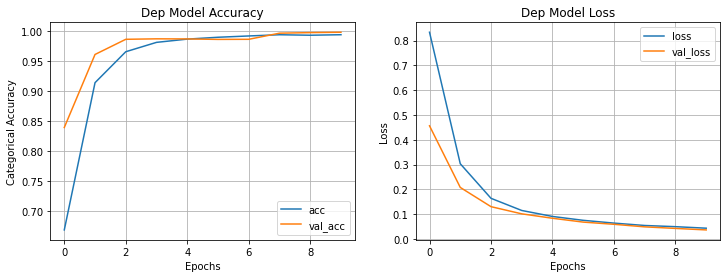

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Dep Model Accuracy')
plt.plot(history.history['categorical_accuracy'], label='acc')
plt.plot(history.history['val_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Dep Model Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Test The Model

Testing the model using test dataset `test_feats`.

In [24]:
predictions = dep_model.predict(test_feats)
print(predictions[:10])

[[3.3946755e-11 5.4468151e-06 8.2162693e-02 3.4389574e-19 9.1783190e-01]
 [1.5051975e-21 2.0766003e-02 6.4228065e-05 2.2260600e-11 9.7916973e-01]
 [6.7171759e-14 8.6679647e-06 4.7554453e-03 2.1716947e-18 9.9523586e-01]
 [7.3336577e-31 9.9858320e-01 4.4022226e-09 2.7706548e-05 1.3890548e-03]
 [8.4036779e-26 8.1208724e-01 1.9674853e-06 1.4790898e-07 1.8791066e-01]
 [0.0000000e+00 1.5037573e-07 3.0548442e-32 9.9999988e-01 1.9593153e-24]
 [3.8920976e-34 9.9937707e-01 1.1000391e-10 5.3047435e-04 9.2435104e-05]
 [0.0000000e+00 3.6761900e-05 1.5628252e-25 9.9996328e-01 5.4557103e-18]
 [1.7117073e-31 9.9905914e-01 4.0034012e-09 2.5205398e-05 9.1563695e-04]
 [1.4431363e-01 1.9341759e-11 8.5568625e-01 5.6766782e-26 1.3106988e-07]]


The prediction result is displayed in 'scientific' format which is rather hard to read.

### Display Prediction Result

Use `np.printoptions(formatter={'float': '{: 0.1f}'.format})` to format the displayed prediction result into 1 number after decimal temporarily (Within the scope of *with* block and then restored the old options at the end.).

In [25]:
with np.printoptions(formatter={'float': '{: 0.1f}'.format}):
  print(predictions[:10])

[[ 0.0  0.0  0.1  0.0  0.9]
 [ 0.0  0.0  0.0  0.0  1.0]
 [ 0.0  0.0  0.0  0.0  1.0]
 [ 0.0  1.0  0.0  0.0  0.0]
 [ 0.0  0.8  0.0  0.0  0.2]
 [ 0.0  0.0  0.0  1.0  0.0]
 [ 0.0  1.0  0.0  0.0  0.0]
 [ 0.0  0.0  0.0  1.0  0.0]
 [ 0.0  1.0  0.0  0.0  0.0]
 [ 0.1  0.0  0.9  0.0  0.0]]


In [26]:
test_labels[:10]

,Normal,Parah,Ringan,Sangat Parah,Sedang
10,0,0,0,0,1
11,0,0,0,0,1
13,0,0,0,0,1
19,0,1,0,0,0
21,0,1,0,0,0
26,0,0,0,1,0
30,0,1,0,0,0
41,0,0,0,1,0
43,0,1,0,0,0
49,0,0,1,0,0


### Predicted Scale

This function is used to print the maximum probability result along with it's column index and the Scale it predicted from a prediction.

1. For each row of prediction, find the column index with maximum probability value.

2. From the column index, define the scale using the column names.

3. Print the maximum value, index column, and it's scale.

In [27]:
def scale_num(predict) :
  max = None

  for prob in predict:
    for idx, result in enumerate(prob):
        if (max is None or result > max):
            max = result
            id = idx 

            if id == 0:
              skala = 'Normal'
            elif id == 1:
              skala = 'Parah'
            elif id == 2:
              skala = 'Ringan'
            elif id == 3:
              skala = 'Sangat Parah'
            elif id == 4:
              skala = 'Sedang'

    print("Max: {}, in Index: {}, Skala Kondisi: {}\n".format(max, id, skala))
    max = None
    
scale_num(predictions[:10])

Max: 0.9178318977355957, in Index: 4, Skala Kondisi: Sedang

Max: 0.9791697263717651, in Index: 4, Skala Kondisi: Sedang

Max: 0.9952358603477478, in Index: 4, Skala Kondisi: Sedang

Max: 0.998583197593689, in Index: 1, Skala Kondisi: Parah

Max: 0.8120872378349304, in Index: 1, Skala Kondisi: Parah

Max: 0.9999998807907104, in Index: 3, Skala Kondisi: Sangat Parah

Max: 0.9993770718574524, in Index: 1, Skala Kondisi: Parah

Max: 0.9999632835388184, in Index: 3, Skala Kondisi: Sangat Parah

Max: 0.9990591406822205, in Index: 1, Skala Kondisi: Parah

Max: 0.8556862473487854, in Index: 2, Skala Kondisi: Ringan



## Save Depression Model

Use `tf.saved_model.save(model, model_path)` to save TensorFlow model.

In [28]:
model_path = 'dep_model'
tf.saved_model.save(dep_model, model_path)

INFO:tensorflow:Assets written to: dep_model/assets


## Convert Depression Model to TFLite

### Convert Model

Use `tf.lite.TFLiteConverter.from_saved_model(model_path)` to convert the saved model into `.tflite` model for Android App use.

Then save the `.tflite` model.

In [29]:
# Convert the saved model into .tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
tflite_model = converter.convert()

# Save the .tflite model
os.makedirs('tflite_models')
with open('tflite_models/dep_model.tflite', 'wb') as f:
  f.write(tflite_model)

### Try The `.tflite` Model

Interpreter interface is used for running TensorFlow Lite models.

To run the `.tflite` model :

1. Load the model into memory.

2. Build an Interpreter based on an existing model.

3. Set input tensor values.

4. Invoke inference.

5. Read output tensor values.

Build the interpreter by using `tf.lite.Interpreter(model_path)`.

In [30]:
# Load Model and Build Interpreter
interpreter = tf.lite.Interpreter(model_path='tflite_models/dep_model.tflite')
interpreter.allocate_tensors()


`interpreter.get_input_details()[0]["index"]` = Get the model's input tensor index in the interpreter.

`interpreter.get_output_details()[0]["index"]` = Get the model's output tensor index in the interpreter.

`interpreter.set_tensor(tensor_index, value)` = Set the values of the input tensor (get a copy).

`interpreter.get_tensor(tensor_index)` = Get the values of the output tensor (get a copy).

In [31]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [32]:
# Set Input Tesnor
input_data = np.array([[2,	2,	2,	1,	3,	3,	3,	2,	2,	3,	3,	2,	2,	2]], dtype=np.float32)
interpreter.set_tensor(input_index, input_data)

# Invoke Inference
interpreter.invoke()

# Read Output Tensor
print(interpreter.get_tensor(output_index))

[[0.0000000e+00 2.4849838e-05 6.3708345e-26 9.9997520e-01 1.9430396e-18]]


In [33]:
with np.printoptions(formatter={'float': '{: 0.1f}'.format}):
  print(interpreter.get_tensor(output_index))

[[ 0.0  0.0  0.0  1.0  0.0]]


In [34]:
scale_num(interpreter.get_tensor(output_index))

Max: 0.9999752044677734, in Index: 3, Skala Kondisi: Sangat Parah



## Download Depression Model

In [35]:
from google.colab import files

In [36]:
# Download TensorFlow saved model in zip file
!zip -r /content/dep_model.zip /content/dep_model
files.download('/content/dep_model.zip')

  adding: content/dep_model/ (stored 0%)
  adding: content/dep_model/saved_model.pb (deflated 88%)
  adding: content/dep_model/variables/ (stored 0%)
  adding: content/dep_model/variables/variables.data-00000-of-00001 (deflated 43%)
  adding: content/dep_model/variables/variables.index (deflated 63%)
  adding: content/dep_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Download .tflite Model in zip file
!zip -r /content/tflite_models.zip /content/tflite_models
files.download('/content/tflite_models.zip')

  adding: content/tflite_models/ (stored 0%)
  adding: content/tflite_models/dep_model.tflite (deflated 28%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>